# Import Dependencies

**Stable Baselines is a Reinforcement learning Library which helps to work with model-free algorithms,we can build a Agent using the stable_baseline library to train that agent on a particular environment**

In [ ]:
!pip install stable_baselines3[extra]

In [1]:
import gym
import os
import numpy as np
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

**We use the `gym` library for creating the environment and training the RL agent in that `environment`,we use `os` for dealing with the paths,i.e once we train our model we will be saving it in a directory,so for navigating through direcotries we will be using the `os` libraries,then we have the `PPO` which is the `RL` algorthim which we will be using,there a lot of different algo's as well one can browse through them <a href = "https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html" target = "_blank">here </a>,we will be using different algo's depending on the environment we will be setting up!,then we have the `DummyVecEnv`,these is used for training your agent on multiple environments on the same time,this is basically used for vectorising you're environments and then setting your agent to train on these environments,simuntaneously!,`evaluate_policy` this is used to track how you're agent is performing in the environment!**

# Understanding the Environment

In [ ]:
## Description of the Cart-Pole Environment on which we will be training our RL agent.

"""
    Description:
        A pole is attached by an un-actuated joint to a cart, which moves along
        a frictionless track. The pendulum starts upright, and the goal is to
        prevent it from falling over by increasing and reducing the cart's
        velocity.
    Source:
        This environment corresponds to the version of the cart-pole problem
        described by Barto, Sutton, and Anderson
    Observation:
        Type: Box(4)
        Num     Observation               Min                     Max
        0       Cart Position             -4.8                    4.8
        1       Cart Velocity             -Inf                    Inf
        2       Pole Angle                -0.418 rad (-24 deg)    0.418 rad (24 deg)
        3       Pole Angular Velocity     -Inf                    Inf
    Actions:
        Type: Discrete(2)
        Num   Action
        0     Push cart to the left
        1     Push cart to the right
        Note: The amount the velocity that is reduced or increased is not
        fixed; it depends on the angle the pole is pointing. This is because
        the center of gravity of the pole increases the amount of energy needed
        to move the cart underneath it
    Reward:
        Reward is 1 for every step taken, including the termination step
    Starting State:
        All observations are assigned a uniform random value in [-0.05..0.05]
    Episode Termination:
        Pole Angle is more than 12 degrees.
        Cart Position is more than 2.4 (center of the cart reaches the edge of
        the display).
        Episode length is greater than 200.
        Solved Requirements:
        Considered solved when the average return is greater than or equal to
        195.0 over 100 consecutive trials.
    """

# Load Environment

**In this notebook we're gonna use the `CartPoleEnvironment` and we're gonna train the `pole` which will be our agent to be stable on the cart,there also many other environments which are present out there,one can have a look at them over <a href = "https://gym.openai.com/envs/CartPole-v1/" target = "_blank">here</a>**

In [3]:
'''
setting the CartPole-v0 environment using the OpenAiGym

'''

env_name = 'CartPole-v0'
env = gym.make(env_name)

**So here we will be training the agent in `episodes`,so for every episode our agent will be going to a new state,will be getting a reward and will be getting the information regarding the environment!,so for every episodes in range of episodes,we're gonna reset the environment first,then we're gonna set the `done` as False indicating that the agent has to explore,then we will run a loop until the done value is not True,that is we will loop until the agent stops its exploration!,then for every action we will be having reward and information related to it,so we will be storing that and we will be adding the reward to the score,after every iteration we will be looking at the score,here `env.render()` is optional,as it will display how the agent is performing in the environment**

In [4]:
episodes = 5
for episode in range(1,episodes+1):
    state = env.reset()
    done = False
    score = 0
    while not done:
        env.render()
        action = env.action_space.sample()
        n_state,reward,done,info = env.step(action)
        score+=reward
        
    print(f'Episode:{episode},score: {score}')
    
env.close()

Episode:1,score: 12.0
Episode:2,score: 12.0
Episode:3,score: 30.0
Episode:4,score: 49.0
Episode:5,score: 27.0


#### Action Space and the Observation Space

**So if we have a look at the description of the environment,the agent can take 2 actions at a ttme,one is `move left` {0} and the other is `move right`{1},so it's sample space is `{0,1}`,here is the representation of it,a sample test of the action_space of the agent**

**From the `env.step(action)`,we will be getting the next set of observations,which we will be storing in the state,reward,done,info variables respectively,as we know that our observation space returns 4 values,so according to the action taken by the agent we will be getting 4 values,and we'll get the reward then we'll get done and then info which is an empty dictionary which we can use to store as information as agents memory,so `env.set(action)` will return 4 things one is the next observation state,then is the reward,then is done and the last is `info`,so the observation state will also have 4 values as shown ↓ in the example,sample(),action we will have either {0 or 1},check out the below cell for eachh of the actions,observations and the step function!**

**The observation space for our environment,will get the `cartposition,cartvelocity,pole angle,pole angular velocity`,so this is what we will be getting in the observation space!,so the agent will observe these values and will try to take some actions either `left or right` based on the `observation space` and will try to maximize the reward which is the reward i.e it'll learn how to make that pole straight so that the reward is maximum,so for training we will be using the policies in a bit**

In [5]:
# 0-push cart to left, 1-push cart to the right,action space is Discrete 
# in this environment,may be different for different environments!

print(env.action_space.sample())

#[cart position, cart velocity, pole angle, pole angular velocity]

print(env.observation_space.sample())

env.step(1)

1
[ 1.6572212e+00 -8.9962100e+37 -3.9015863e-02  2.5729664e+37]


C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\gym\logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


(array([ 0.14396832,  0.76761836, -0.24404511, -1.46293657]), 0.0, True, {})

In [6]:
env.action_space

Discrete(2)

### Types of RL Algorthims

<img src = "https://spinningup.openai.com/en/latest/_images/rl_algorithms_9_15.svg">

**The `Model-Free RL` algo just considers the current step observations to make predictions,where as `Model-Based-RL` tries to make prediction of the future state of teh model to try to make the best possible action,i.e this kind of `algo` try to predict the future state in advance,and based on the rewards which are probable they try to make the agent take the action in the current state!,one can read about these algorithms <a href = 'https://spinningup.openai.com/en/latest/user/algorithms.html#why-these-algorithms' target = "_blank">here</a>**

**So selecting an appropriate algo is done by knowing the exact `action space`,so we have the action space as `Discrete`,so lets look at the table below which has listed the types of algos which we can use according to the action space we are having!**

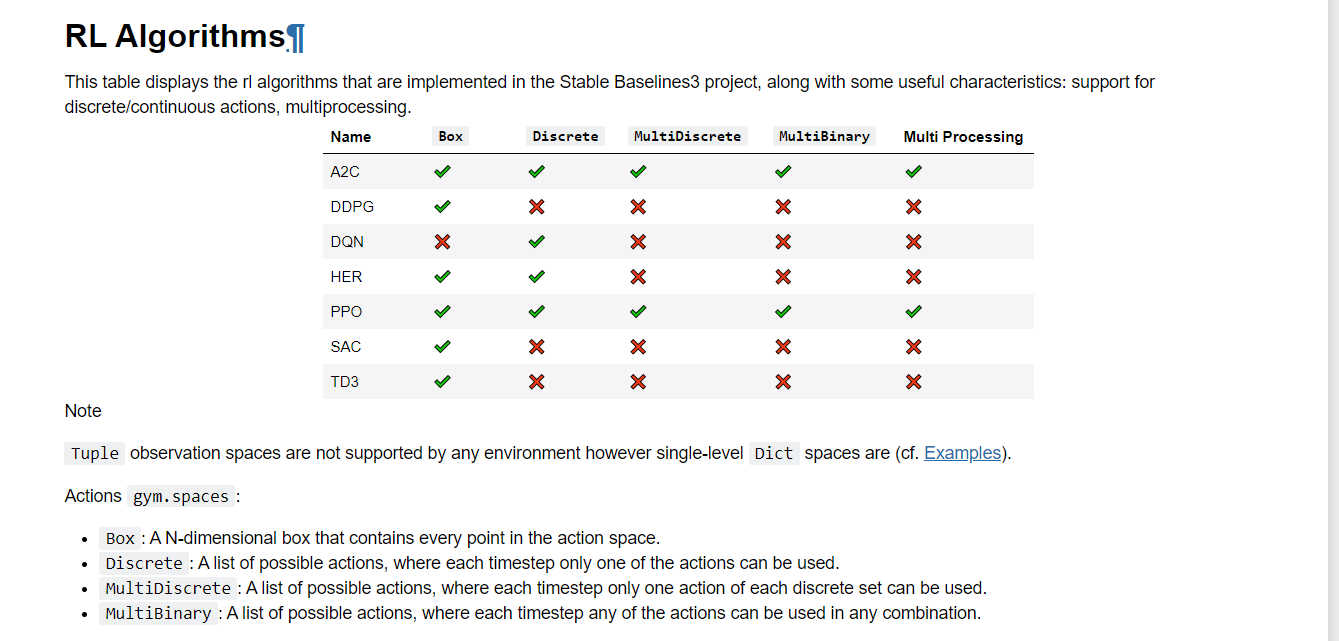

**So based on the action space for the environment which is `Discrete`,we can use 4 different algorithms which are `DQR,PPO,HER,AUC`,so firstly i'll be working with the PPO algo,then train my agent on that model,check out the logs and save the model,and try out with some other Algo,and do the comparision onto which algo will best suit for the agent based on metrics!**

In [7]:
import torch
torch.__version__

'1.8.1+cpu'

# Train an RL Model

**First things first we're gonna make the log path where we will be storing all our logs,then we will be setting our environment,by using `gym.make`,and then as discussed earlier that `DummyVecEnv` is used for vectorising,i.e allowing our agent to work on multiple environments at a single go,so here for every env,do this action kind of function is used,so that's the reason we used `lambda : env`,this actually means that make list of actions and observations space according to the environments!,then after we're gonna use the RL algo as selected from the above table,and then monitor our logs on the `tensorboard_logs` as shown in the ↓ code!**

In [8]:
# Setting the log path,well we'll be using Tensorboard to monitor 
# our metrics and logs,so inorder to store the logs i have to make a 
# directory for this!

path = 'Training/Logs/'
if not os.path.join(path):
    path = os.path.join(path)
    
env = gym.make(env_name)
env = DummyVecEnv([lambda:env])
model = PPO('MlpPolicy',env,verbose = 1,tensorboard_log= path)

Using cpu device


**Once we're done with the tensorboard setup,we will now be making our model to learn,by using the ↓ code,so in the policy we have the `MlpPolicy` which is a multilayer preceptron policy which is nothing but ANN,so we're using a vanilla ANN,we're not using CNN or LSTM's,we'll be using the vanilla ANN for training,so we'll be training our model for 20k steps,we can train it for even more,but lets see how it performs**


In [9]:
model.learn(total_timesteps=20000)

Logging to Training/Logs/PPO_4
-----------------------------
| time/              |      |
|    fps             | 574  |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 745         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.012117847 |
|    clip_fraction        | 0.11        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | -0.000346   |
|    learning_rate        | 0.0003      |
|    loss                 | 7.42        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0166     |
|    value_loss           | 51.2        |
-----------------------------------------
---

# Save and Reload Model

In [10]:
# making the path for saving the model

ppo_path = os.path.join('Training','Saved Models','PPO_Model_cartpole')

# saving the PPO model

model.save(ppo_path)

In [11]:
ppo_path

'Training\\Saved Models\\PPO_Model_cartpole'

In [12]:
## deleting the model and then load it again {simulating deployment}

del model

model = PPO.load(ppo_path,env=env)

# Evaluation

**If our agent gets a score of 200 or higher,then the PPO algorithm has worked perfectly fine for our model,so as we've trained our model,then saved it,and then we have loaded the model,now we're gonna evaluate our model soon,so we're gonna evaluate our model based on the `evaluate_policy` as defined ↓**

In [13]:
from stable_baselines3.common.evaluation import evaluate_policy
evaluate_policy(model = model,env=env,n_eval_episodes=10,render=True)
env.close()

C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\stable_baselines3\common\evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


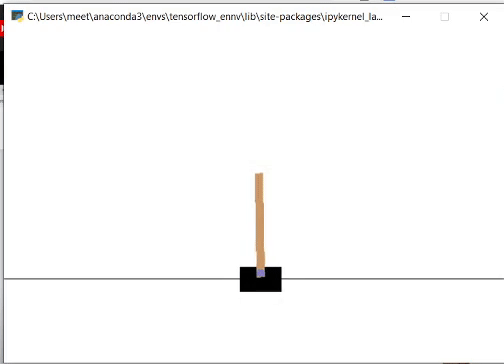

**That is how our agent performed when we loaded it and evaluated it,we see that it is doing well inorder to make the pole `still straight`,lets try to test it using the prediction and get to know the scores,remember for `PPO` algo if we get a reward of 200+ for every episode we are good to go with that!**

# Test Model

**So the main purpose of training the model was to make the agent learn and map it's actions to the observation space!,so we have trained the model,now the agent knows what actions it has to take given the observations,right,so in the testing phase what we'll be doing is instead of passing the action space,we will be just passing the observation space and let the `agent` do it all by itself,i.e let the agent take up the actions according to the observation space!,that is the main aim right!,given an environment and observation space,train your agent in such a way that for every action it has to maximum reward!,so all that it is to it!**

In [14]:
episodes = 5
for episode in range(1,episodes+1):
    obs = env.reset()
    done = False
    score = 0
    while not done:
        env.render()
        action,_ = model.predict(obs)
        obs,rewards,done,info = env.step(action)
        score+=reward
        
    print(f' Episode : {episode} and score is : {score}')
    
env.close()

 Episode : 1 and score is : 200.0
 Episode : 2 and score is : 200.0
 Episode : 3 and score is : 200.0
 Episode : 4 and score is : 200.0
 Episode : 5 and score is : 200.0


In [15]:
## dummy testing it,so we'll pass in the observations and let
## the agent predict the actions and then it loops until done is True!


action,_states = model.predict(obs)
obs,rewards,done,info = env.step(action)
print(obs,rewards,done,info)

[[-0.04836395 -0.17929254  0.04187267  0.25654978]] [1.] [False] [{}]


# Viewing Logs in Tensorboard

In [16]:
path = 'Training/Logs/'
training_logpath = os.path.join(path,'PPO_train')
training_logpath

'Training/Logs/PPO_train'

# Adding a callback to the training Stage

**The main purpose of this is to regulate our agent to not learn more,setting a call back is one way of regulating the overfitting condition of ANN which is very common,so as our model is using the `MLPPolicy`,which is related to neural networks,so we can set a callback which will ensure that the model has to train uptil this end and that will be its best score,i mean will not overfit on data anymore,so its a kind of regularsing things!**

In [17]:
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold
import os

In [18]:
save_path = os.path.join('Training','Saved Models')
log_path = os.path.join('Training','Logs')

In [19]:
## recreating the environment,model and setting the callbacks!

env = gym.make(env_name)
env = DummyVecEnv([lambda: env])
stopcallback = StopTrainingOnRewardThreshold(reward_threshold=190,verbose=1)
eval_callback = EvalCallback(env,
                            callback_on_new_best=stopcallback,
                            eval_freq=10000,
                            best_model_save_path=save_path,
                            verbose=1)

**so what the above lines of code are doing is,the first thing is we are stoping the training on a reward threshold,i.e we're setting a callback to the model that hey,when you get the reward as 190,you stop your training now on,focus on the Evaluation!,so in the Eval**

In [20]:
model = PPO('MlpPolicy', env, verbose = 1, tensorboard_log=log_path)
model.learn(total_timesteps = 20000,callback = eval_callback)

Using cpu device
Logging to Training\Logs\PPO_5
-----------------------------
| time/              |      |
|    fps             | 1197 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 969          |
|    iterations           | 2            |
|    time_elapsed         | 4            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0057932683 |
|    clip_fraction        | 0.0846       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.686       |
|    explained_variance   | 0.000357     |
|    learning_rate        | 0.0003       |
|    loss                 | 7.24         |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.0142      |
|    value_loss           | 60.6         |
-----------

In [21]:
evaluate_policy(model,env=env,n_eval_episodes=10,render=True)
env.close()

In [23]:
episodes = 5
for episode in range(1,episodes+1):
    obs = env.reset()
    done = False
    score = 0
    while not done:
        env.render()
        action,_ = model.predict(obs)
        obs,rewards,done,info = env.step(action)
        score+=reward
        
    print(f'Episode : {episode} and score is : {score}')
    
env.close()

Episode : 1 and score is : 180.0
Episode : 2 and score is : 131.0
Episode : 3 and score is : 200.0
Episode : 4 and score is : 89.0
Episode : 5 and score is : 72.0


# Using an Alternate Algorithm

In [45]:
from stable_baselines3 import DQN,HER

env = gym.make(env_name)
env = DummyVecEnv([lambda: env])
dqn_model = DQN('MlpPolicy',env,verbose = 1,tensorboard_log=log_path)
dqn_model.learn(total_timesteps=20000)

Using cpu device
Logging to Training\Logs\DQN_4
----------------------------------
| rollout/            |          |
|    exploration rate | 0.969    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 154      |
|    time_elapsed     | 0        |
|    total timesteps  | 66       |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.921    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 353      |
|    time_elapsed     | 0        |
|    total timesteps  | 167      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.887    |
| time/               |          |
|    episodes         | 12       |
|    fps              | 460      |
|    time_elapsed     | 0        |
|    total timesteps  | 237      |
----------------------------------
-------

----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 108      |
|    fps              | 1770     |
|    time_elapsed     | 1        |
|    total timesteps  | 2402     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 112      |
|    fps              | 1768     |
|    time_elapsed     | 1        |
|    total timesteps  | 2459     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 116      |
|    fps              | 1785     |
|    time_elapsed     | 1        |
|    total timesteps  | 2545     |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 216      |
|    fps              | 1945     |
|    time_elapsed     | 2        |
|    total timesteps  | 4856     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 220      |
|    fps              | 1955     |
|    time_elapsed     | 2        |
|    total timesteps  | 4967     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 224      |
|    fps              | 1976     |
|    time_elapsed     | 2        |
|    total timesteps  | 5081     |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 324      |
|    fps              | 2227     |
|    time_elapsed     | 3        |
|    total timesteps  | 7234     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 328      |
|    fps              | 2232     |
|    time_elapsed     | 3        |
|    total timesteps  | 7329     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 332      |
|    fps              | 2231     |
|    time_elapsed     | 3        |
|    total timesteps  | 7395     |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 432      |
|    fps              | 2331     |
|    time_elapsed     | 4        |
|    total timesteps  | 9672     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 436      |
|    fps              | 2332     |
|    time_elapsed     | 4        |
|    total timesteps  | 9753     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 440      |
|    fps              | 2329     |
|    time_elapsed     | 4        |
|    total timesteps  | 9815     |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 540      |
|    fps              | 2324     |
|    time_elapsed     | 5        |
|    total timesteps  | 11812    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 544      |
|    fps              | 2325     |
|    time_elapsed     | 5        |
|    total timesteps  | 11897    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 548      |
|    fps              | 2326     |
|    time_elapsed     | 5        |
|    total timesteps  | 11977    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 648      |
|    fps              | 2352     |
|    time_elapsed     | 6        |
|    total timesteps  | 14265    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 652      |
|    fps              | 2353     |
|    time_elapsed     | 6        |
|    total timesteps  | 14339    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 656      |
|    fps              | 2353     |
|    time_elapsed     | 6        |
|    total timesteps  | 14413    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 756      |
|    fps              | 2345     |
|    time_elapsed     | 7        |
|    total timesteps  | 16532    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 760      |
|    fps              | 2345     |
|    time_elapsed     | 7        |
|    total timesteps  | 16607    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 764      |
|    fps              | 2348     |
|    time_elapsed     | 7        |
|    total timesteps  | 16712    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 864      |
|    fps              | 2380     |
|    time_elapsed     | 7        |
|    total timesteps  | 18996    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 868      |
|    fps              | 2383     |
|    time_elapsed     | 8        |
|    total timesteps  | 19105    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 872      |
|    fps              | 2384     |
|    time_elapsed     | 8        |
|    total timesteps  | 19194    |
----------------------------------
----------------------------------
| rollout/          

In [46]:
episodes = 5
for episode in range(1,episodes+1):
    obs = env.reset()
    done = False
    score = 0
    while not done:
        env.render()
        action,_ = dqn_model.predict(obs)
        obs,reward,done,info = env.step(action)
        score+=reward
        
    print(f'Episode: {episode},score : {score}')
        
env.close()

Episode: 1,score : [9.]
Episode: 2,score : [10.]
Episode: 3,score : [8.]
Episode: 4,score : [8.]
Episode: 5,score : [10.]


**From the above scores we can see that the `POP` algorithm gave us the best result as compared to the DQN and other Algorithms!**